In [91]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

In [92]:
import os.path
import csv

def load_csv_file(filepath):

    if not os.path.isfile(filepath):
        print("Nie odnaleziono pliku!")
        return None
    elif filepath[-4:] != ".csv":
        print("Błędne rozszerzenie pliku!")
        return None
    else:
        print("Znaleziono plik!")
        return load_data_from_csv(filepath)
        
def load_data_from_csv(filepath):
    
    headers = ['Sex', 'Length', 'Diameter', 
                'Height', 'Whole weight', 
                'Shucked weight', 'Viscera weight', 
                'Shell weight', 'Rings']
    
    types = {'Sex':str, 'Length':np.float32, 
             'Diameter':np.float32, 'Height':np.float32, 
             'Whole weight':np.float32, 'Shucked weight':np.float32, 
             'Viscera weight':np.float32, 'Shell weight':np.float32,
             'Rings':np.uint8}
    
    data_container = pd.read_csv(filepath, header=None, names=headers, dtype=types)

    return data_container

In [93]:
data = load_csv_file('data/data.csv')

Znaleziono plik!


In [94]:
first_table = data.groupby('Sex')['Sex'].agg(['count'])
first_table['%'] = 100 * first_table['count'] / first_table['count'].sum()
first_table = first_table.rename(index={'F': 'Female', 'I': 'Infant', 'M': 'Male'})
first_table.index.name = None

print(first_table)

        count          %
Female   1307  31.290400
Infant   1342  32.128322
Male     1528  36.581278


In [95]:
second_table = data.describe().transpose()
del second_table['count']
print(second_table)

                    mean       std     min     25%     50%     75%      max
Length          0.523992  0.120092  0.0750  0.4500  0.5450   0.615   0.8150
Diameter        0.407881  0.099240  0.0550  0.3500  0.4250   0.480   0.6500
Height          0.139516  0.041827  0.0000  0.1150  0.1400   0.165   1.1300
Whole weight    0.828743  0.490389  0.0020  0.4415  0.7995   1.153   2.8255
Shucked weight  0.359368  0.221963  0.0010  0.1860  0.3360   0.502   1.4880
Viscera weight  0.180593  0.109614  0.0005  0.0935  0.1710   0.253   0.7600
Shell weight    0.238831  0.139202  0.0015  0.1300  0.2340   0.329   1.0050
Rings           9.933684  3.224169  1.0000  8.0000  9.0000  11.000  29.0000


Text(0, 0.5, 'count')

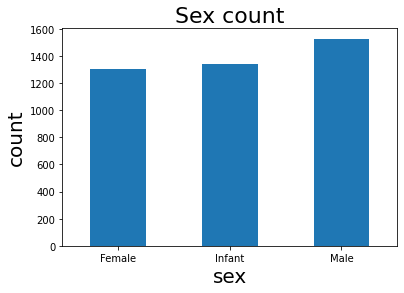

In [96]:
plot = first_table['count'].plot.bar(rot=0)
plot.set_title("Sex count", fontdict={'fontsize': 22})
plot.set_xlabel("sex", fontdict={'fontsize': 20})
plot.set_ylabel("count", fontdict={'fontsize': 20})

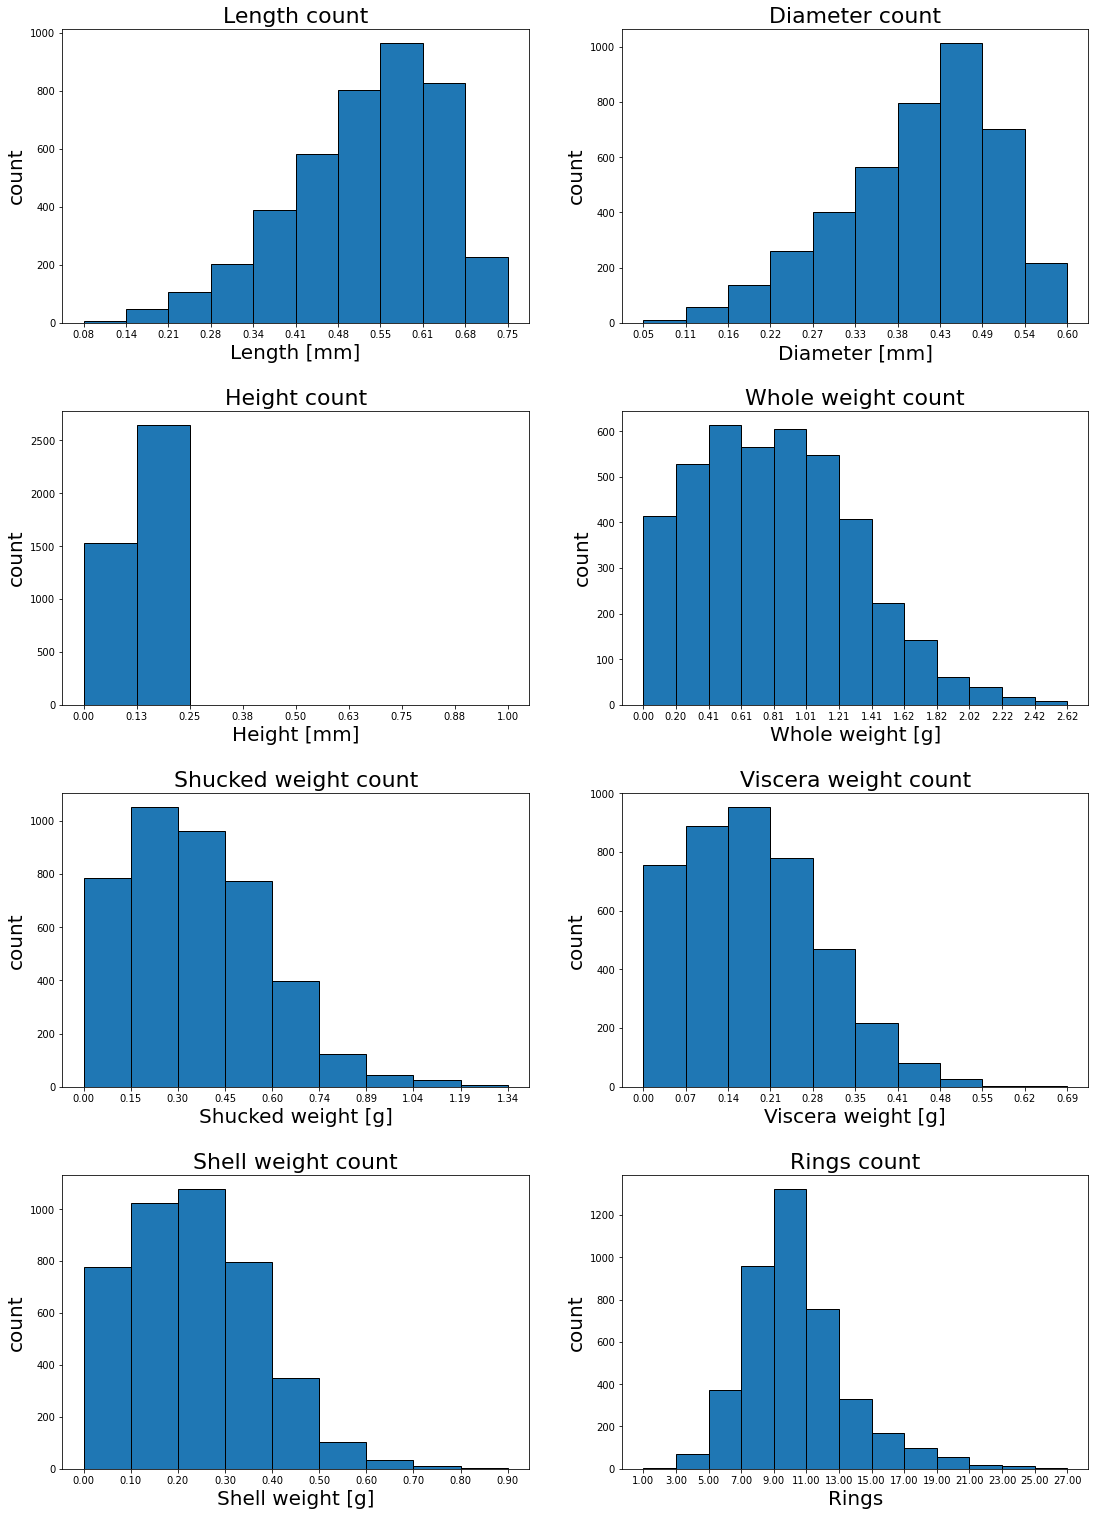

In [97]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.subplots_adjust(left=None, bottom=0, right=2.5, top=5, wspace=None, 
                    hspace=0.3)
hist_counts = [11, 11, 9, 14, 10, 11, 10, 14]
measures = ['mm', 'mm', 'mm', 'g', 'g', 'g', 'g']
columns = iter(data)
next(columns)
i = 0

for column in columns:
    min_val, max_val = min(data[column].values), max(data[column].values)
    dif = np.arange(min_val, max_val, (max_val - min_val) / hist_counts[i])
    plot = data[column].plot.hist(ax=axes[i // 2, i % 2], edgecolor='black',
                                 linewidth=1, align='mid', bins=dif)
    
    ax = axes[i // 2, i % 2]
    ax.set_xticks(dif)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plot.set_title(column + ' count', fontdict={'fontsize': 22})

    xlabel = column + ' [' + measures[i] + ']' if i < len(measures) else column
    plot.set_xlabel(xlabel, fontdict={'fontsize': 20})
    plot.set_ylabel('count', fontdict={'fontsize': 20})
    
    i += 1